In [3]:
import pandas as pd
read = pd.read_excel("../data/Online Retail.xlsx")
read.dropna(inplace=True)
read["TotalSum"] = read["UnitPrice"] * read["Quantity"]
read["InvoiceDate"] = pd.to_datetime(read["InvoiceDate"].dt.strftime('%Y-%m-%d'))
read["InvoiceMonth"] = pd.to_datetime(read["InvoiceDate"].dt.strftime('%Y-%m'))
snapshot = read["InvoiceDate"].max()
snapshot = snapshot + pd.Timedelta(days=1)
read.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,2011-12-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,2011-12-01


In [2]:
read.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth
336799,566405,22732,3D VINTAGE CHRISTMAS STICKERS,18,2011-09-12,1.25,17919.0,United Kingdom,22.50,2011-09-01
199171,554088,23233,WRAP POPPIES DESIGN,25,2011-05-22,0.42,16801.0,United Kingdom,10.50,2011-05-01
492087,578088,23332,IVORY WICKER HEART LARGE,4,2011-11-22,1.65,16376.0,United Kingdom,6.60,2011-11-01
378518,569652,84978,HANGING HEART JAR T-LIGHT HOLDER,12,2011-10-05,1.25,15628.0,United Kingdom,15.00,2011-10-01
39414,539642,21544,SKULLS WATER TRANSFER TATTOOS,5,2010-12-20,0.85,15867.0,United Kingdom,4.25,2010-12-01
174773,551849,22499,WOODEN UNION JACK BUNTING,12,2011-05-04,5.95,16258.0,United Kingdom,71.40,2011-05-01
93888,544316,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,12,2011-02-17,1.25,16556.0,United Kingdom,15.00,2011-02-01
288856,562210,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,12,2011-08-03,1.45,13486.0,United Kingdom,17.40,2011-08-01
293085,562576,23198,PANTRY MAGNETIC SHOPPING LIST,3,2011-08-07,1.45,15518.0,United Kingdom,4.35,2011-08-01
218228,556032,85132B,CHARLIE AND LOLA TABLE TINS,24,2011-06-08,1.95,15159.0,United Kingdom,46.80,2011-06-01


In [8]:
#her bir müşteri için ilk katıldığı ay;
customer_group = read.groupby("CustomerID")["InvoiceMonth"]
customer_group.head()

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541768   2011-12-01
541769   2011-12-01
541770   2011-12-01
541771   2011-12-01
541772   2011-12-01
Name: InvoiceMonth, Length: 21206, dtype: datetime64[ns]

In [9]:
# yeni transform metodu   / --join dene--
read["CohortMonth"] = customer_group.transform('min')
read.head()
#her müşterinin katıldığı ay elde edildi

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [12]:
cohort_year = read["CohortMonth"].dt.year
cohort_month = read["CohortMonth"].dt.month
invoice_year = read["InvoiceDate"].dt.year
invoice_month = read["InvoiceDate"].dt.month

In [15]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
real_diff = (year_diff * 12) + (month_diff + 1)
read["CohortIndex"] = real_diff # --ay farkı bulmayı araştır--
read.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom,25.50,2010-12-01,2010-12-01,1
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom,11.10,2010-12-01,2010-12-01,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom,11.10,2010-12-01,2010-12-01,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047.0,United Kingdom,54.08,2010-12-01,2010-12-01,1


In [37]:
cohort_data = read.groupby(["CohortMonth","CohortIndex"])
cohort_data = cohort_data["CustomerID"].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head() # to dataframe dene

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341


In [39]:
cohort_counts = cohort_data.pivot(index="CohortMonth",columns="CohortIndex",values="CustomerID")
cohort_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN


In [41]:
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0)
retention.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN


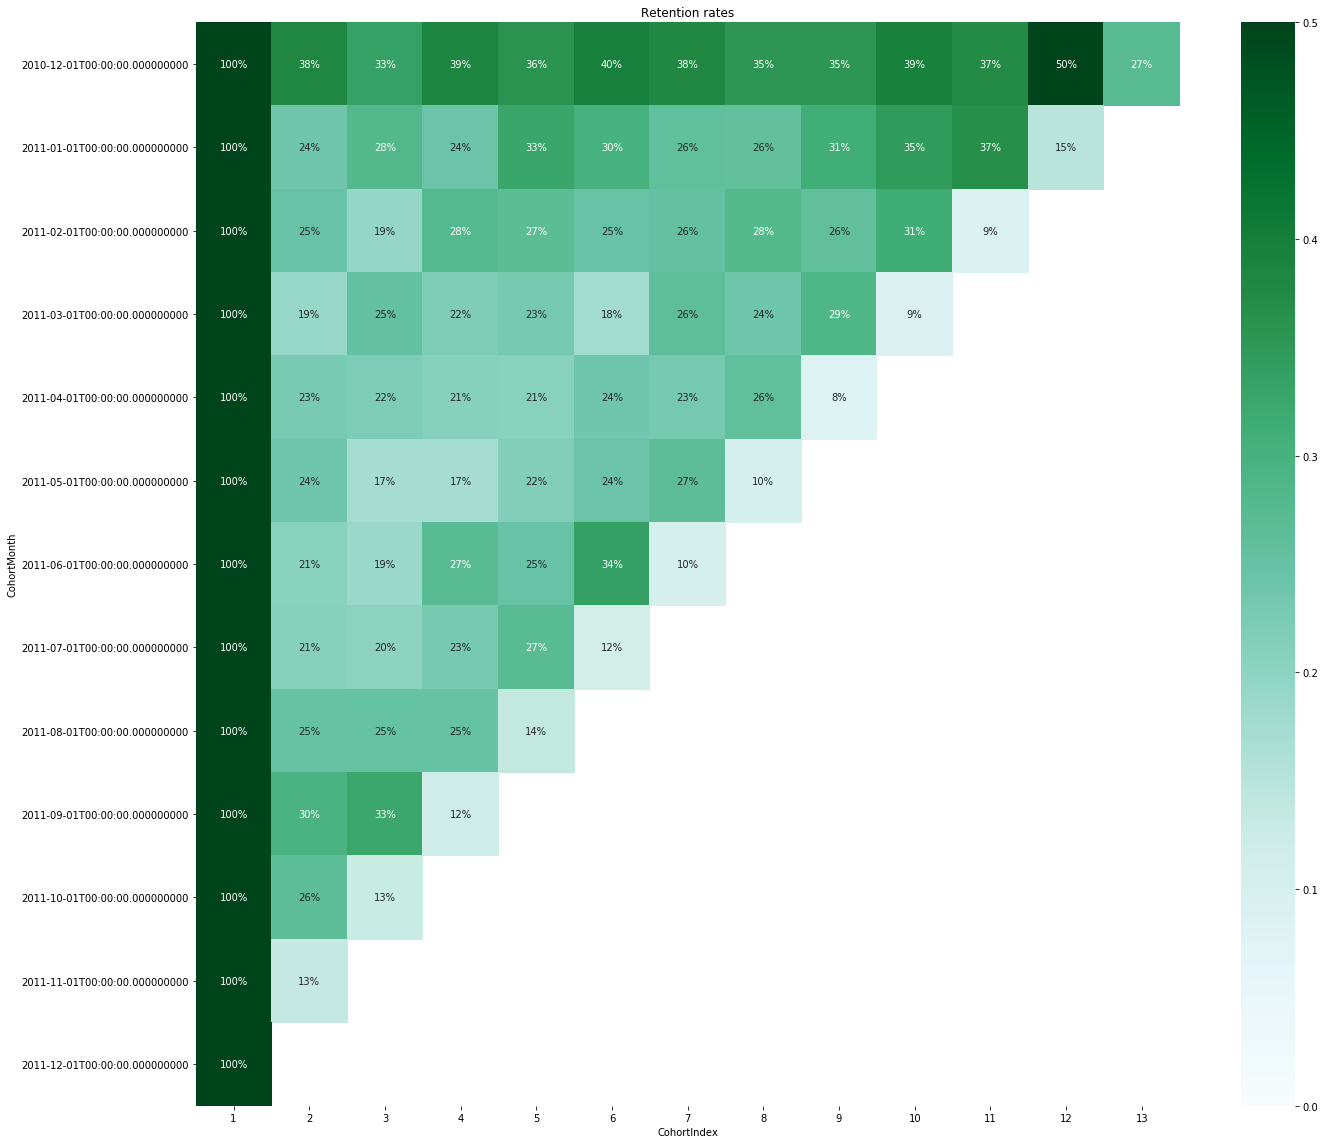

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(1,1,1)
ax.set_title('Retention rates')
sns.heatmap(data = retention, ax=ax, annot = True, fmt = '.0%', vmin = 0.0, vmax = 0.5, cmap = 'BuGn')
fig.tight_layout()

In [43]:
# clv farklı yaklaşımlar var, en temelinde müşteri kazanıldığıda belli zaman aralığında ne kadar para kazanacağım, kar kazanacağım
# life span normalde churn olmalı
#basic clv
import numpy as np
profit_margin = 1.0
monthly_revenue = read.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()
# her bir müşterinin her fatura ayi için ortalama harcama miktarı
# ayın ortalama harcama miktarı
lifespan_months = 12 # churn denemesi yap
clv_basic = monthly_revenue * profit_margin * lifespan_months 
print('Basic CLV = {:.1f} USD'.format(clv_basic)) # ortalama olarak bir müşteriden şu kadar kazanmayı bekliyorum

Basic CLV = 7283.4 USD


In [44]:
monthly_revenue

606.9517962705685

CustomerID  InvoiceMonth
12346.0     2011-01-01         0.00
12347.0     2010-12-01       711.79
            2011-01-01       475.39
            2011-04-01       636.25
            2011-06-01       382.52
                             ...   
18283.0     2011-10-01       114.65
            2011-11-01       651.56
            2011-12-01       208.00
18287.0     2011-05-01       765.28
            2011-10-01      1072.00
Name: TotalSum, Length: 13675, dtype: float64

In [48]:
#GRANULAR CLV
#her bir satıştaki ortalama kazanç, ortalama alışveriş miktarı, ortalama lifespan ile çarp
#müşteri odaklı değil, satış veya fatura odaklı --birim-- analiz

profit_margin = 1.0
# maliyeti bilmediğimiz için net kar bilgisini elde edemiyoruz
revenue_per_purchase = read.groupby(['InvoiceNo'])['TotalSum'].mean().mean()
# her bir fatura başına harcanan ortalama miktar
freq = read.groupby(['CustomerID','InvoiceMonth'])['InvoiceNo'].nunique().mean()
# müşterilerin aylık harcama sıklıklarının ortalaması
# RFM analizindeki Frequency metriğinin ortalama değeri
lifespan_months = 12
clv_granular = revenue_per_purchase * freq * profit_margin * lifespan_months
print('Granular CLV = {:.1f} USD'.format(clv_granular)) # her satıştan yıllık beklentim bu kadar

Granular CLV = 669.2 USD


In [49]:
print('Revenu per Purchase = {:.1f} USD'.format(revenue_per_purchase)) # invoice başına bu kadar satış bekliyorsun
print('Frequency for Month = {:.1f}'.format(freq)) # bir müşteriden 1 yıl boyunca 669 dolar kazanmayı bekliyoruz 1.6 defa geldiği için bir ayda
# her müşteri bana 1 yıl boyunca geliyor varsayımı biraz negatif

Revenu per Purchase = 34.4 USD
Frequency for Month = 1.6


In [50]:
monthly_revenue = read.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()
retention_rate = retention.iloc[:,1:].mean().mean()
# her bir aya ait devam eden müşteri ortalamasının ortalaması
churn_rate = 1 - retention_rate
# devam etmeyen müşteri oranı
clv_traditional = monthly_revenue * (retention_rate / churn_rate)
print("Traditional CLV = {:.1f} USD".format(clv_traditional))
print("Retention Rate = {:.1f}".format(100 * retention_rate))
#retention rate her ay ortalam olarak insanların devamlılık miktarı
# insanların yüzde 26'sı 1 yıl boyunca düzenli alışveriş yapıyorlar
# kapıdan giren herkes 1 yılın sonunda 215 dolar bırakacak**

Traditional CLV = 215.3 USD
Retention Rate = 26.2
